In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
def get_deg(ct):
    deg_dir = f'/data/female-amb/Diff.Result/DEG.stats/{ct}'
    expr = pd.read_hdf(f'{deg_dir}/expr.hdf').T
    use_genes = expr[expr.sum(axis = 1) > 0.1].index
    stats = np.load(f"{deg_dir}/{ct}.2mo-{ct}.18mo.npz") #fc:(2mo/18mo)
    
    deg = pd.DataFrame({'fc': (expr[f'{ct}.18mo'] /expr[f'{ct}.2mo']).values,'fdr':stats['fdr']}, index = expr.index).loc[use_genes]
    deg['log2(18mo/2mo)'] = np.log2(deg['fc']) 
    deg['-log10(padj)'] = -np.log10(deg['fdr'] + 1e-200)
    deg =deg[deg['fdr'] < 0.5]
    return deg

In [5]:
ct = 'DG_Glut'

In [8]:
all_diff_domain = pd.read_csv('ALL.Diff.Domain.csv', index_col = 0)
all_diff_domain = all_diff_domain[all_diff_domain['celltype'] == ct]
all_diff_domain.head()

,8wk,9mo,18mo,18mo-8wk,celltype
chr1_381,0.111111,0.125786,0.162823,0.051712,DG_Glut
chr1_686,0.153739,0.165618,0.241090,0.087352,DG_Glut
chr1_1020,0.092942,0.098532,0.144654,0.051712,DG_Glut
chr1_1034,0.120196,0.122292,0.197065,0.076869,DG_Glut
chr1_1346,0.145353,0.139064,0.201957,0.056604,DG_Glut


In [29]:
luisa_dir = '/home/qzeng_salk_edu/project/2404017_check_rna/luisa_deg'
luisa_df = pd.read_csv(f'{luisa_dir}/{ct}.csv', index_col = 0)
luisa_df['-log10(padj)'] = -np.log10(luisa_df['p_val_adj'] + 1e-200)
luisa_df['avg_log2FC'] = -luisa_df['avg_log2FC']
luisa_df.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,-log10(padj)
Nrg1,0.0,1.279634,0.512,0.836,0.0,200.0
Snhg11,0.0,1.234044,0.407,0.702,0.0,200.0
Gm48530,0.0,2.092791,0.112,0.401,0.0,200.0
Zfp804b,0.0,1.415103,0.266,0.536,0.0,200.0
Xist,0.0,0.855881,0.562,0.827,0.0,200.0


In [36]:
deg_df = get_deg(ct)
deg_df.head()

,fc,fdr,log2(18mo/2mo),-log10(padj)
gene,,,,
Xkr4,0.878425,3.235856e-49,-0.187009,48.490011
Tcea1,1.077127,1.992782e-02,0.107188,1.700540
Atp6v1h,0.904945,1.262231e-16,-0.144098,15.898861
Rb1cc1,1.014312,3.347916e-01,0.020501,0.475225
St18,0.891766,9.261004e-18,-0.165263,17.033342


In [37]:
toplot = pd.concat([deg_df['log2(18mo/2mo)'], luisa_df['avg_log2FC']], axis = 1).dropna()

[(-3.0, 3.0), (-3.0, 3.0)]

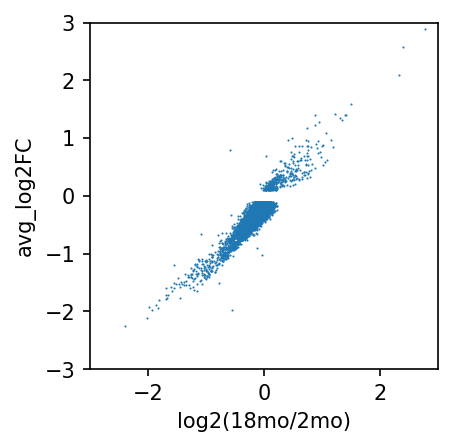

In [41]:
fig, ax = plt.subplots(figsize= (3,3), dpi = 150)
sns.scatterplot(data = toplot,
                ax = ax, s = 1, linewidth = 0,
               x = 'log2(18mo/2mo)', y = 'avg_log2FC')
ax.set(xlim= (-3,3),ylim= (-3,3))